จาก [ep ที่แล้ว AI จำแนกรูปภาพ หมา แมว 37 สายพันธุ์](https://www.bualabs.com/archives/469/how-to-deep-learning-pets-cats-dogs-image-classification-with-fastai-v1-ep-1/) เราได้ใช้ fastai version 1 ในการทำ Image Classification ได้ผลลัพธ์แม่นยำ 94% โดยใช้เวลาเทรนเพียงแค่ไม่เกิน 5 นาที กับ Code หลัก ๆ เพียงแค่ 3 บรรทัด เวลาผ่านไปหลายเดือน ขณะนี้ fastai ออกเวอร์ชันใหม่ เป็น fastai2 มี API ที่เปลี่ยนไปเล็กน้อย เน้นความยืดหยุ่นมากขึ้น ช่วยให้เราเทรนโมเดล และข้อมูลที่มีความซับซ้อนได้อย่างสะดวกยิ่งขึ้น

# 0. Magic Commands

ให้ใส่ไว้บนสุดทุก Notebook เป็นการสั่งให้ Notebook ก่อนรัน ให้รีโหลด Library ภายนอกที่เรา import ไว้ใหม่โดยอัตโนมัติ 

และให้พล็อตกราฟ matplotlib ใน Output ของ cell แบบ code ได้เลย

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# 1. Install & Import Library

Install fastai2 หรือ fastai version 2 และ Import Library ที่เราจะใช้ 

การ import * หมายความว่า import ทุกอย่างที่อยู่ใน package ทำให้เราไม่ได้ต้องมา import ทีละ class การ import แบบนี้ เหมาะสำหรับการทดลองอะไรใหม่ ๆ เพราะเราไม่ต้องย้อนมาแก้ import ทุกครั้งเมื่อต้องการใช้ class ใหม่ ๆ แต่ไม่แนะนำสำหรับใช้งานจริงบน Production

In [1]:
!pip install fastai2 -q

     |████████████████████████████████| 184kB 24.5MB/s 


Import 3 Package ย่อย คือ basics, vision.all, callback.all

In [0]:
from fastai2.basics import *
from fastai2.vision.all import *
from fastai2.callback.all import *

เราจะกำหนด Random Seed จะได้ผลลัพธ์ที่เหมือนกันทุกครั้ง จะได้สะดวกในการเปรียบเทียบ

In [0]:
np.random.seed(42)

# 2. ข้อมูล

ในเคสนี้ เราจะใช้ข้อมูลจาก Oxford-IIIT Pet Dataset by O. M. Parkhi et al., 2012 ซึ่งเป็นชุดข้อมูลรูปภาพหมา 25 พันธุ์ และรูปแมว 12 พันธุ์ รวมเป็น 37 หมวดหมู่ 

อ้างอิงจากใน paper ในปี 2012 โมเดลที่ดีที่สุด สามารถทำนายพันธุ์สัตว์ ได้ถูกต้อง 59.21% โดยโมเดลนั้น ออกแบบมาเฉพาะทาง สำหรับแยกรูปสัตว์ หัวสัตว์ ตัวสัตว์ โดยเฉพาะ (สมัยนันยังไม่ใช่ Deep Learning)

เรามาดูกันว่าเราจะใช้ [Deep Learning](https://www.bualabs.com/archives/tag/deep-learning/) ทำนายพันธุ์หมาแมวจากรูป ได้ถูกต้องแม่นยำกว่าหรือไม่ 

URL ของ Dataset ที่เราจะ Download มาใช้

In [151]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

untar_data จะดาวน์โหลดไฟล์มาเก็บไว้ แตกไฟล์ แล้ว return path ที่เก็บไฟล์เหล่านั้นไว้

In [112]:
path = untar_data(URLs.PETS)
path

Path('/root/.fastai/data/oxford-iiit-pet')

List ดูว่ามีโฟลเดอร์อะไรบ้าง

In [113]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

เข้าไป List ดูไฟล์ในโฟลเดอร์ annotations

In [157]:
(path/"annotations").ls()

(#7) [Path('/root/.fastai/data/oxford-iiit-pet/annotations/._trimaps'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/xmls'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/list.txt'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/test.txt'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/trimaps'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/trainval.txt'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/README')]

เข้าไป List ดูไฟล์ในโฟลเดอร์ images

In [114]:
(path/"images").ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_170.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_86.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_109.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_83.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_203.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_13.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_128.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_15.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_172.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_55.jpg')...]

# 3. เตรียมข้อมูล

ก่อนนำข้อมูลใด ๆ มาเทรน Model เราต้องมีการเตรียมข้อมูล กำหนด [Data Pipeline](https://www.bualabs.com/archives/2693/data-block-api-data-pipeline-machine-learning-supervised-learning-preprocessing-ep-5/) ให้อยู่ในรูปแบบที่เหมาะสมเสียก่อน

นำรายชื่อไฟล์รูปภาพทั้งหมด มาใส่ไว้ใน ตัวแปร fnames

In [152]:
fnames = get_image_files(path/"images")
fnames

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_170.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_86.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_109.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_83.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_203.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_13.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_128.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_15.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_172.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_55.jpg')...]

กำหนด Pattern ของ [Regex](https://www.bualabs.com/archives/3070/what-is-regular-expression-regex-regexp-teach-how-to-regex-python-nlp-ep-7/) สำหรับสกัดข้อมูล ชื่อสายพันธุ์ จากชื่อไฟล์รูปภาพ

In [0]:
pat = r"(.+)_\d+.jpg$"

กำหนด [Data Augmentation](https://www.bualabs.com/archives/1170/what-is-data-augmentation-benefits-data-augmentaion-deep-learning-training-model-deep-neural-network-regularization-ep-1/) สำหรับ การ Transformation ระดับ Batch 

In [0]:
batch_tfms = [*aug_transforms(size=224, max_warp=0.25), Normalize.from_stats(*imagenet_stats)]

กำหนด Data Augmentation สำหรับ การ Transformation ระดับ Item

In [0]:
item_tfms = RandomResizedCrop(448, min_scale=0.75, ratio=(1., 1.))

กำหนด ขนาด [Batch Size](https://www.bualabs.com/archives/729/what-is-batch-size-in-deep-neural-networks-how-to-adjust-machine-learning-model-accuracy-deep-learning-hyperparameter-tuning-ep-2/) ที่จะ Feed ให้โมเดล

In [0]:
bs = 64

## 3.1 ImageDataLoaders

สร้าง ImageDataLoaders จากชื่อไฟล์ และ RegEx

In [0]:
dls = ImageDataLoaders.from_name_re(path, fnames, pat, bs=bs, 
                                     batch_tfms=batch_tfms, item_tfms=item_tfms)

show_batch แสดงข้อมูลรูปภาพ พร้อม Label จำนวน 1 Batch

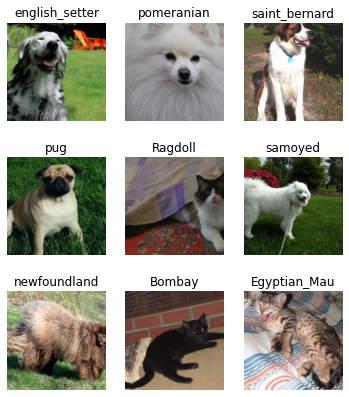

In [121]:
dls.show_batch(max_n=9, figsize=(6, 7))

## 3.2 DataBlock 

อีกวิธีหนึ่ง คือ เราสามารถ สร้าง Data Pipeline ด้วย [DataBlock API](https://www.bualabs.com/archives/2693/what-is-data-pipeline-data-block-api-data-pipeline-machine-learning-supervised-learning-preprocessing-ep-5/) เวอร์ชันใหม่ ที่มีความยืดหยุ่นมากกว่า ImageDataLoaders

In [0]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(), 
                 get_y=RegexLabeller(pat=r"/([^/]+)_\d+.*"), 
                 item_tfms=item_tfms, 
                 batch_tfms=batch_tfms)

In [0]:
path_im = path/"images"

In [0]:
dls = pets.dataloaders(path_im, bs=bs)

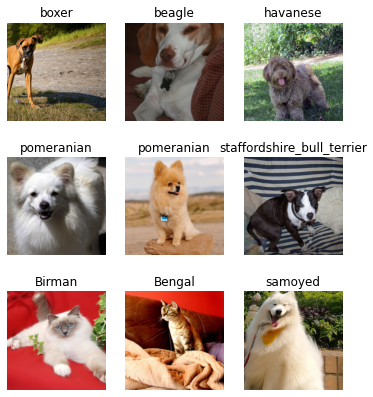

In [125]:
dls.show_batch(max_n=9, figsize=(6, 7))

In [126]:
dls.vocab

(#37) ['Abyssinian','Bengal','Birman','Bombay','British_Shorthair','Egyptian_Mau','Maine_Coon','Persian','Ragdoll','Russian_Blue'...]

In [127]:
dls.vocab.o2i

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

In [0]:
learn = cnn_learner(dls, resnet34, pretrained=True, metrics=error_rate).to_fp16()

In [129]:
learn.fit_one_cycle(6)

In [0]:
learn.save("01i-stage1")

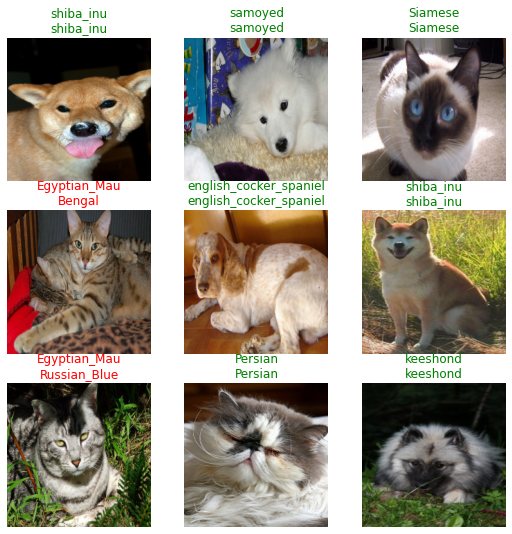

In [131]:
learn.show_results()

In [132]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()

len(dls.valid_ds) == len(losses) == len(idxs)

True

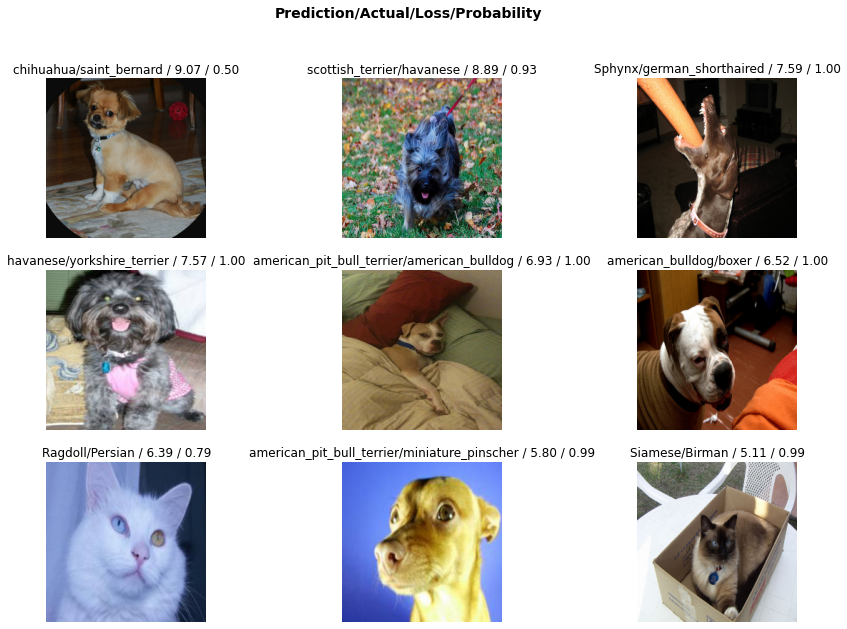

In [133]:
interp.plot_top_losses(9, figsize=(15, 10))

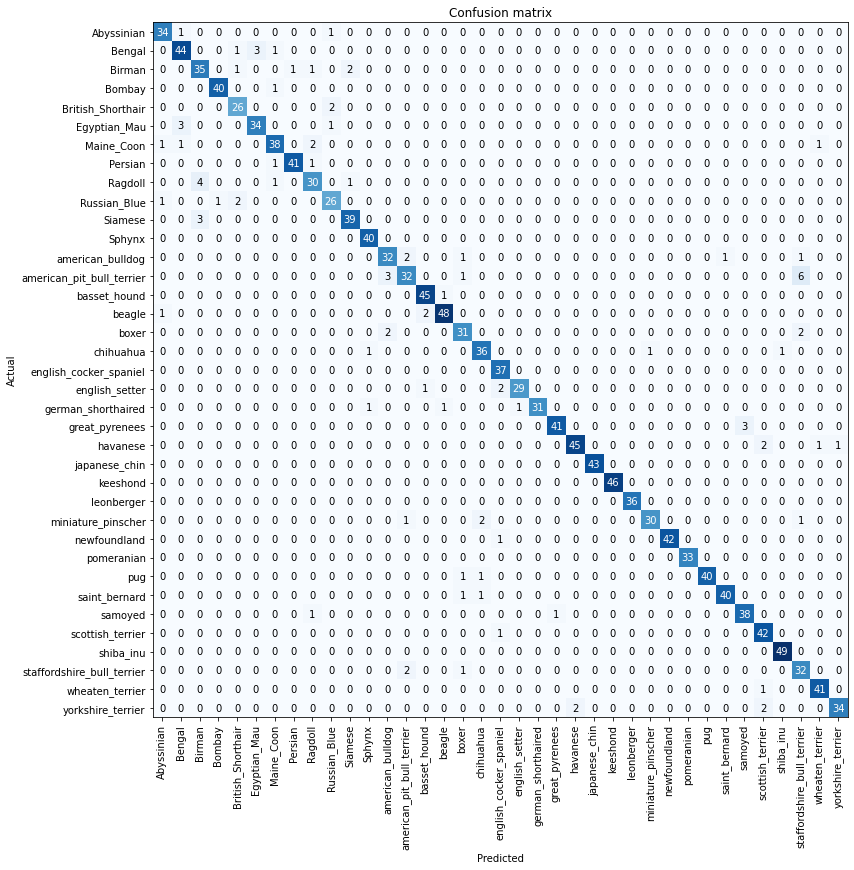

In [134]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=72)

In [135]:
interp.most_confused(min_val=3)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Ragdoll', 'Birman', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Siamese', 'Birman', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('great_pyrenees', 'samoyed', 3)]

In [136]:
learn.load("01i-stage1")

In [0]:
learn.unfreeze()

In [138]:
learn.fit_one_cycle(2)

In [147]:
learn.load("01i-stage1")

In [0]:
learn.unfreeze()

SuggestedLRs(lr_min=2.2908675418875645e-07, lr_steep=6.309573450380412e-07)

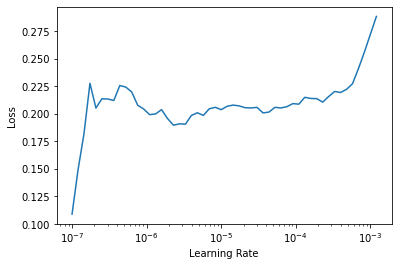

In [141]:
learn.lr_find()

In [149]:
learn.fit_one_cycle(3, lr_max=slice(1e-6, 1e-5))

In [0]:
learn.save('01i-stage2')

# Credit 

* https://forums.fast.ai/t/a-walk-with-fastai2-vision-study-group-and-online-lectures-megathread/59929
* [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf)